### Curso de imágenes - Especialidad I (2018) - FAMAF-UNC

**Alumna: L. Fischer**

# Trabajo practico nº 7

In [1]:
%matplotlib inline

from matplotlib import pyplot as plt
import numpy as np

## Ejercicio 1:
Realizar una simulación determinista de la formación de la imagen por contraste de absorción de un cilindro de agua de 10 cm de diámetro y **altura** irradiado con un haz paralelo de fotones de 50 keV y tamaño de campo de 10 cm × 10 cm. (Detección ideal). Graficar perfil central de la imagen e interpretarlo en términos de las propiedades fı́sicas.


*Esto se puede ver en el plano x-y siendo z el que pasa por el eje del cilindro.*
*Tengo un haz paralelo de energía fija que incide en el círculo de radio 5 cm.*

El haz incidente de $E_0 = 50 keV$ se atenua siguiendo la relación:
$$  E = E_0  \ e^{- \mu \Delta x}  $$
en mi caso $\Delta x$ es un valor fijo que tiene que ver con la distancia entre paso y paso. Así la atenuación será proporcional a la cantidad de veces que está dentro del cilindo:
$$E_f = E_0 \ e^{- n \mu \Delta x}$$ 
siendo n la candidad de pasos dentro del cilindro.

El valor de $\mu$ para fotones de 50 keV se consigue de tabla y es:  $ \mu = 0.2269 \ cm^{-1} $

*En mi caso tomo $\Delta x = 0.1 \ cm$*

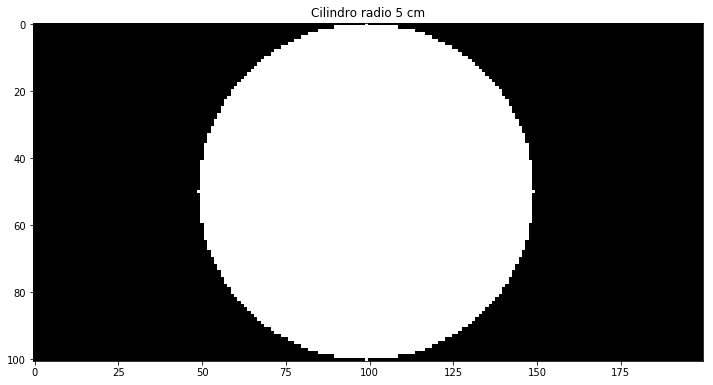

In [85]:
#Datos del problema
E0= 50 
mu= 0.2269
Delta_x = 0.1

N= 101 #y (ancho cilindo, equivale a 10 cm, Tiene que ser un valor impar)
M= 200 #x (hay detector)
matriz_espacio = np.zeros([N,M])  # para probar la primera vez tomo "pixeles de 0.1 cm"

#Resuelvo en un plano: creo el cilindo en la matriz

#Defino el cilindo < R=5
R = int(N/2.)

if 0==np.mod(N,2):
    N = N-1

if np.mod(M,2)==0:
    M = M-1

c=[int(N/2.),int(M/2.)]

#Funcion auxiliar: Norma Euclidea
def euclidea(imagen, x1, x2, y1, y2):
    DistanciaE = np.sqrt( (x1-x2)**2 + (y1-y2)**2)
    return DistanciaE

#Distacia ecuclidea:
for i in range(M):
    for j in range(N):
        dist = euclidea(matriz_espacio, c[1], i, c[0], j)
        if  R>= dist:
            matriz_espacio[j,i] = 1
        else:
            matriz_espacio[j,i] = 0

fig = plt.figure(figsize=(12,16))
plt.imshow(matriz_espacio, cmap='gray')
plt.title('Cilindro radio 5 cm')
plt.show()

Coincida 0cm con el eje del cilindro, en el plano:


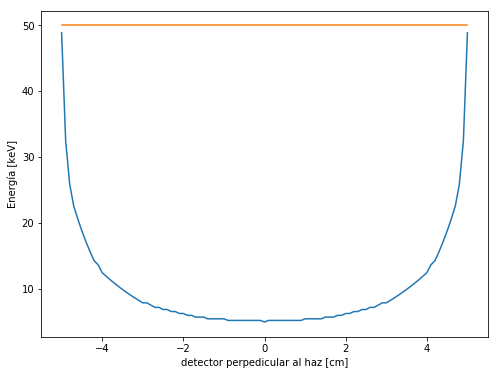

In [86]:
#Pongo un detecto que sera un vector
vec_detect = np.zeros(N)
suma = np.zeros(N)

for j in range(N):
    suma[j] = np.sum(matriz_espacio[j,:])

vec_detect = E0* np.exp(- mu * suma * Delta_x)

#GRAFICO lo obtenido en el detector:

print(u'Coincida 0cm con el eje del cilindro, en el plano:')

ejex = np.arange(N)/10. - 5.

fig = plt.figure(figsize=(8,6))

p1= plt.plot(ejex, vec_detect)
p2=plt.plot([-5,5], [50,50], label= 'Energía E0')
plt.xlabel(u'detector perpedicular al haz [cm]') 
plt.ylabel(u'Energía [keV]')

plt.show()


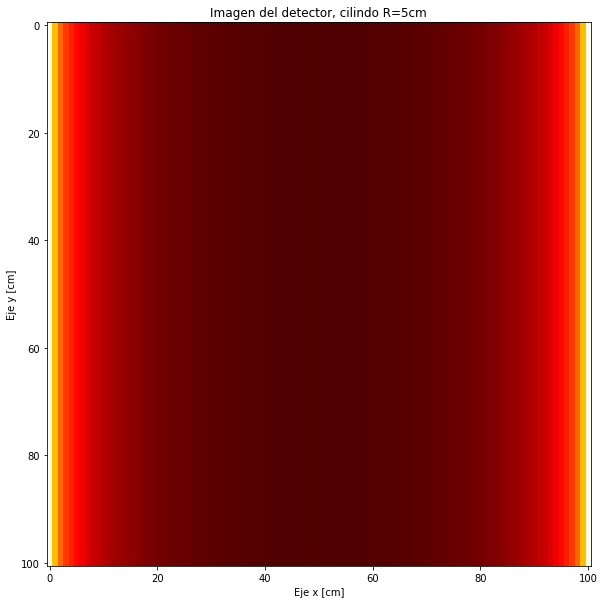

In [87]:
#Hago imagen que mostraría el detector:

detector_50 = np.zeros((N,N))

for j in range(N):
    detector_50[j,:] = vec_detect

#Normalizo respecto de la energía incidente:

detector_50 = detector_50*255/E0

fig_50keV = plt.figure(figsize=(12,10))
plt.imshow(detector_50, cmap='hot', vmin=0, vmax=255)

plt.xlabel(u'Eje x [cm]') 
plt.ylabel(u'Eje y [cm]')
plt.title(u'Imagen del detector, cilindo R=5cm')

plt.show()

## Ejercicio 2:
Repetir el ejercicio del item anterior para un haz incidente de 2 canales energéticos igualmente probables de 50 keV y 30 keV. Analizar y discutir los resultados obtenidos.


El valor de $\mu$ para fotones de 50 keV se consigue de tabla y es:  $ \mu = 0.2269 \ cm^{-1} $

El valor de $\mu$ para fotones de 30 keV se consigue de tabla y es:  $ \mu = 0.3756 \ cm^{-1} $

*En mi caso tomo $\Delta x = 0.1 \ cm$*

In [88]:
#Datos del problema
E0= 50 
E1= 30
mu0= 0.2269
mu1= 0.3756
Delta_x = 0.1

N= 101 #y (ancho cilindo, equivale a 10 cm, Tiene que ser un valor impar)
M= 200 #x (hay detector)
matriz_espacio = np.zeros([N,M])  # para probar la primera vez tomo "pixeles de 0.1 cm"

#ANALAGO AL EJERCICIO ANTERIOR RESUELVO EN EL PLANO, CREO EL CILINDRO.

#Defino el cilindo < R=5
R = int(N/2.)

if 0==np.mod(N,2):
    N = N-1

if np.mod(M,2)==0:
    M = M-1

c=[int(N/2.),int(M/2.)]

#Funcion auxiliar: Norma Euclidea
def euclidea(imagen, x1, x2, y1, y2):
    DistanciaE = np.sqrt( (x1-x2)**2 + (y1-y2)**2)
    return DistanciaE

#Distacia ecuclidea:
for i in range(M):
    for j in range(N):
        dist = euclidea(matriz_espacio, c[1], i, c[0], j)
        if  R>= dist:
            matriz_espacio[j,i] = 1
        else:
            matriz_espacio[j,i] = 0

Coincida 0cm con el eje del cilindro, en el plano:


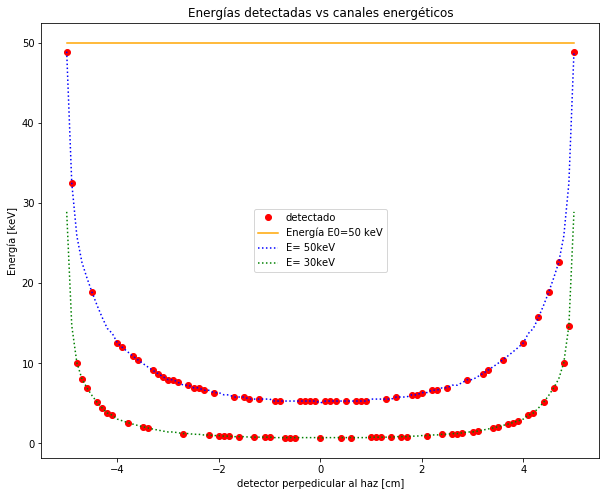

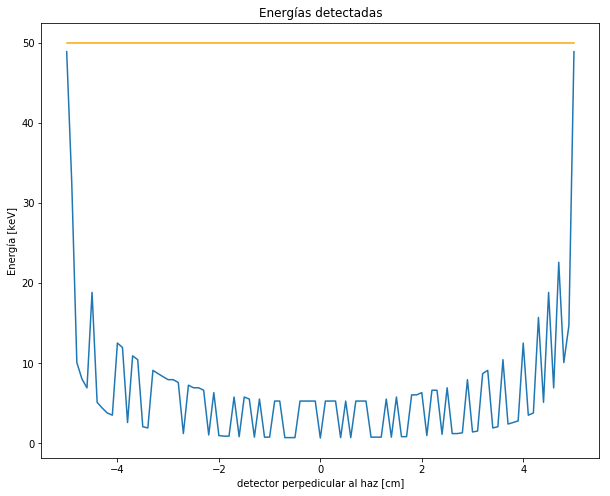

In [89]:
#Pongo un detecto que sera un vector
vec_detect = np.zeros(N)
suma = np.zeros(N)

for j in range(N):
    suma[j] = np.sum(matriz_espacio[j,:])

for i in range(N):
    #Sorteo la posibilidad de que el haz sea de 50 keV o 30 keV:
    sorteo = np.random.rand()
    if sorteo <= 0.5:
        mu= mu0
        E= E0
    else:
        mu= mu1
        E= E1

    vec_detect[i] = E* np.exp(- mu * suma[i] * Delta_x)


#Parametros para un gráfico auxiliar:
vec_aux30 = E1* np.exp(- mu1 * suma * Delta_x)

#GRAFICO lo obtenico en el detector:
print(u'Coincida 0cm con el eje del cilindro, en el plano:')

ejex = np.arange(N)/10. - 5.

fig1 = plt.figure(figsize=(10,8))

p1= plt.plot(ejex, vec_detect, 'ro', label='detectado')
p2=plt.plot([-5,5], [50,50], color='orange',label= 'Energía E0=50 keV')
p3= plt.plot(ejex, vec_aux50, 'b:' ,label='E= 50keV')
p4=plt.plot(ejex, vec_aux30, 'g:' ,label='E= 30keV')
plt.xlabel(u'detector perpedicular al haz [cm]') 
plt.ylabel(u'Energía [keV]')
plt.legend()
plt.title(u'Energías detectadas vs canales energéticos')

fig2 = plt.figure(figsize=(10,8))

p1= plt.plot(ejex, vec_detect)
p2=plt.plot([-5,5], [50,50], color='orange',label= 'Energía E0=50 keV')
plt.xlabel(u'detector perpedicular al haz [cm]') 
plt.ylabel(u'Energía [keV]')
plt.title(u'Energías detectadas')


plt.show()

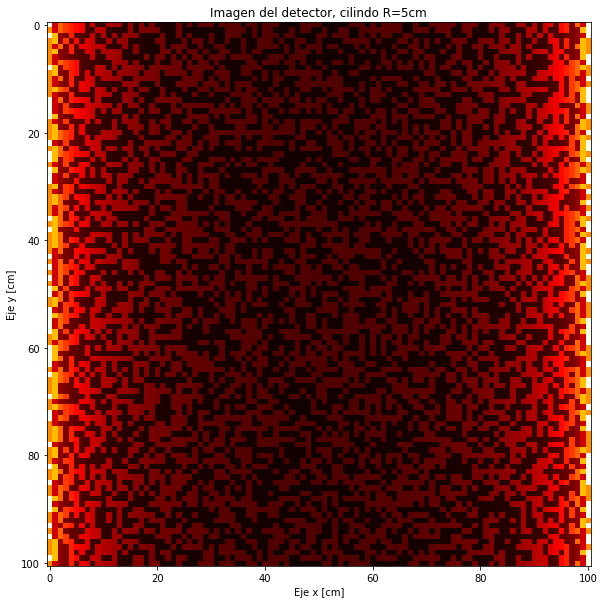

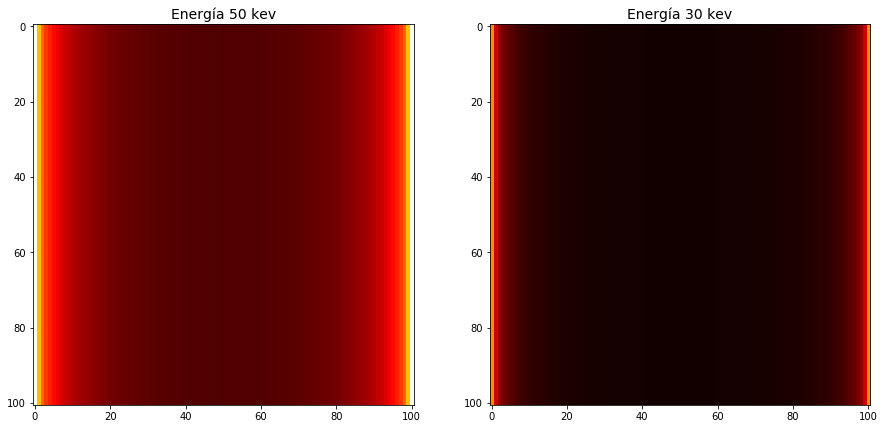

In [91]:
#Hago imagen que mostraría el detector:

detector = np.zeros((N,N))

for j in range(N):
    for i in range(N):
        #Sorteo la posibilidad de que el haz sea de 50 keV o 30 keV:
        sorteo = np.random.rand()
        if sorteo <= 0.5:
            mu= mu0
            E= E0
        else:
            mu= mu1
            E= E1

        vec_detect[i] = E* np.exp(- mu * suma[i] * Delta_x)

    detector[j,:] = vec_detect


#Imagen de 30 keV (Extra)

detector_30 = np.zeros((N,N))

for j in range(N):
    detector_30[j,:] = vec_aux30

detector_30 = detector_30*255/E0
    
#GRAFICO DEL DETECTOR

fig = plt.figure(figsize=(12,10))

detector = detector*255/E0

plt.imshow(detector, cmap='hot',  vmin=0, vmax=255)

plt.xlabel(u'Eje x [cm]') 
plt.ylabel(u'Eje y [cm]')
plt.title(u'Imagen del detector, cilindo R=5cm')


plt.show()

#Grafico auxiliar 50 y 30keV
fig_aux = plt.figure(figsize=(15,10))

ax1 = plt.subplot(121)
ax2 = plt.subplot(122)

ax1.imshow(detector_50, cmap='hot', vmin=0, vmax=255)
ax2.imshow(detector_30, cmap='hot', vmin=0, vmax=255)

ax1.set_title(u'Energía 50 kev', fontsize=14)
ax2.set_title(u'Energía 30 kev', fontsize=14)
plt.show()


**Conclusión:**

*Es importante tener en cuenta que a diferentes energías el coeficiente de atenuación lineal varia. Como se esperaba cuando la energía del haz incidente es mayor el cilindro lo atenua menos.*

*Realizar este proceso deterministico puede ser util para decidir con que energías irradiar una muestra que tiene un espesor dado. Ya que si se elije una energía muy baja al detector no llegara el haz y si es demasiado alta el detector se satura.*

## Ejercicio 3:
Realizar una simulación Monte Carlo análoga al primer item. Analizar los
resultados.

## Ejercicio 4:
Simular un set up experimental tı́pico del instrumento de laboratorio.

*El set up típico de laboratorio que armé es el que corresponde a la tesis*